<a href="https://colab.research.google.com/github/GOKULA-127/TARP/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import io, pandas as pd
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))
df.head()


Saving Crop_recommendation.csv to Crop_recommendation.csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(df.shape)
df.info()
print(df['label'].value_counts())

# Quick stats
df.describe()


(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute          

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split into features and target
X = df.drop('label', axis=1)
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


🌾 Random Forest Accuracy: 99.55%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00

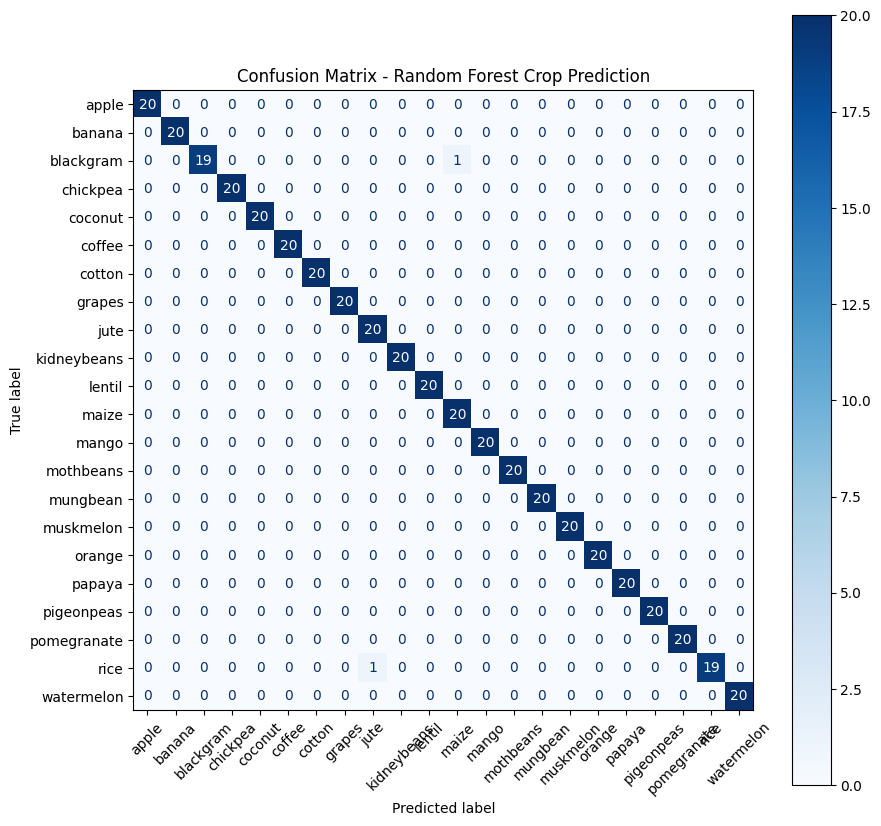

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# ✅ Step 1: Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# ✅ Step 2: Make predictions
y_pred = rf.predict(X_test)

# ✅ Step 3: Evaluate model
print(f"🌾 Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# ✅ Step 4: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45, ax=plt.gca())
plt.title("Confusion Matrix - Random Forest Crop Prediction")
plt.show()


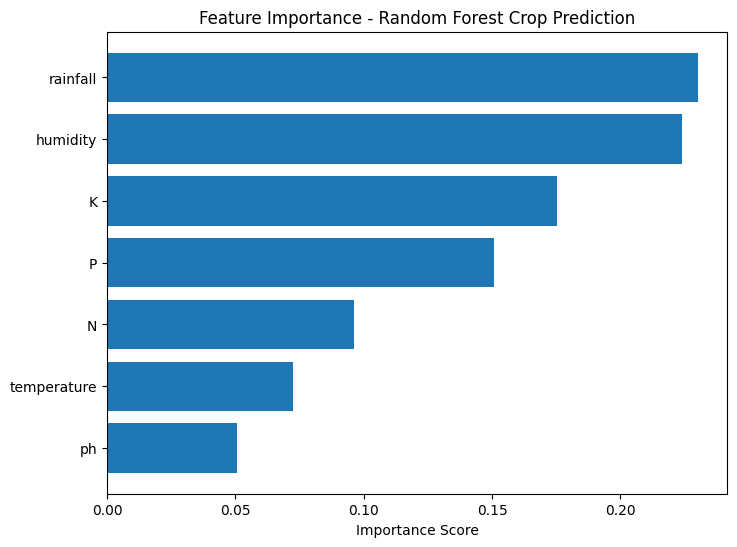

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create DataFrame for sorting and visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest Crop Prediction")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
18
18.9def predict_crop_user_input():
    print("🌾 Enter the environmental and soil details below:")

    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value: "))
    rainfall = float(input("Rainfall (mm): "))

    # Prepare and scale input
    import numpy as np
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_data = scaler.transform(input_data)

    # Predict
    prediction = rf.predict(scaled_data)
    crop_name = le.inverse_transform(prediction)[0]
    print(f"\n✅ Recommended Crop: **{crop_name.upper()}**")

# Run the function
predict_crop_user_input()
4

🌾 Enter the environmental and soil details below:
Nitrogen content (N): 76
Phosphorus content (P): 57
Potassium content (K): 0
Temperature (°C): 74.52
Humidity (%): 6.09
pH value: 6
Rainfall (mm): 150

✅ Recommended Crop: **COFFEE**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"🌾 Random Forest Model Accuracy: {accuracy * 100:.2f}%")


🌾 Random Forest Model Accuracy: 99.55%


🌳 Decision Tree Accuracy: 97.95 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.0

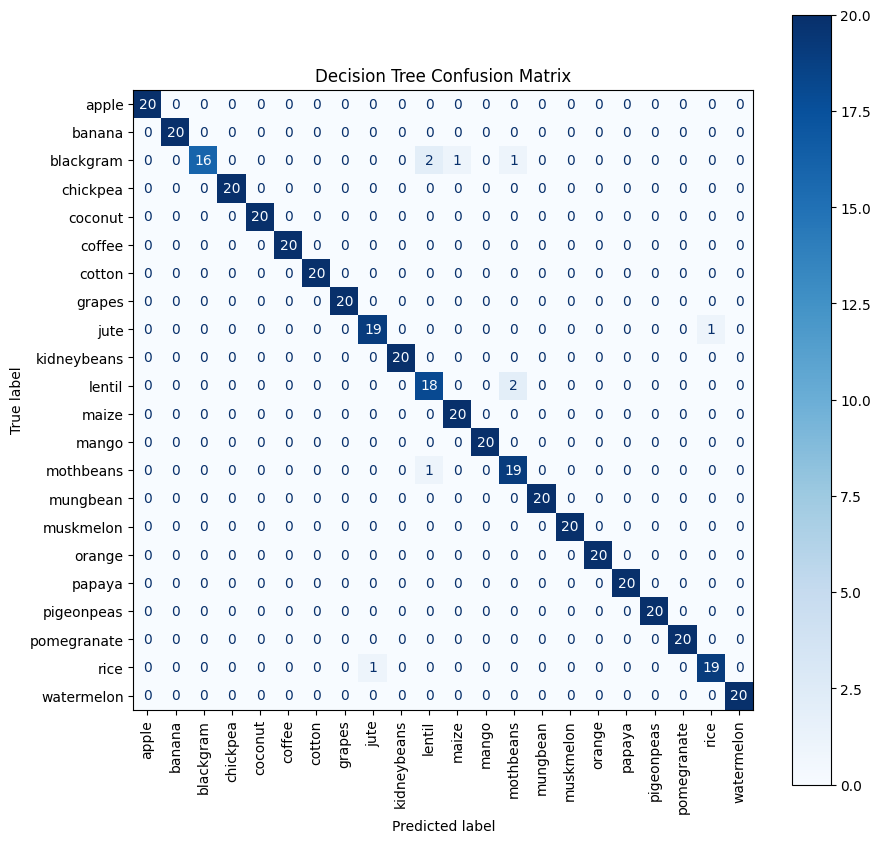

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("🌳 Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=90, ax=plt.gca())
plt.title("Decision Tree Confusion Matrix")
plt.show()


⚡ SVM Accuracy: 98.41 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.90      0.95        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.0

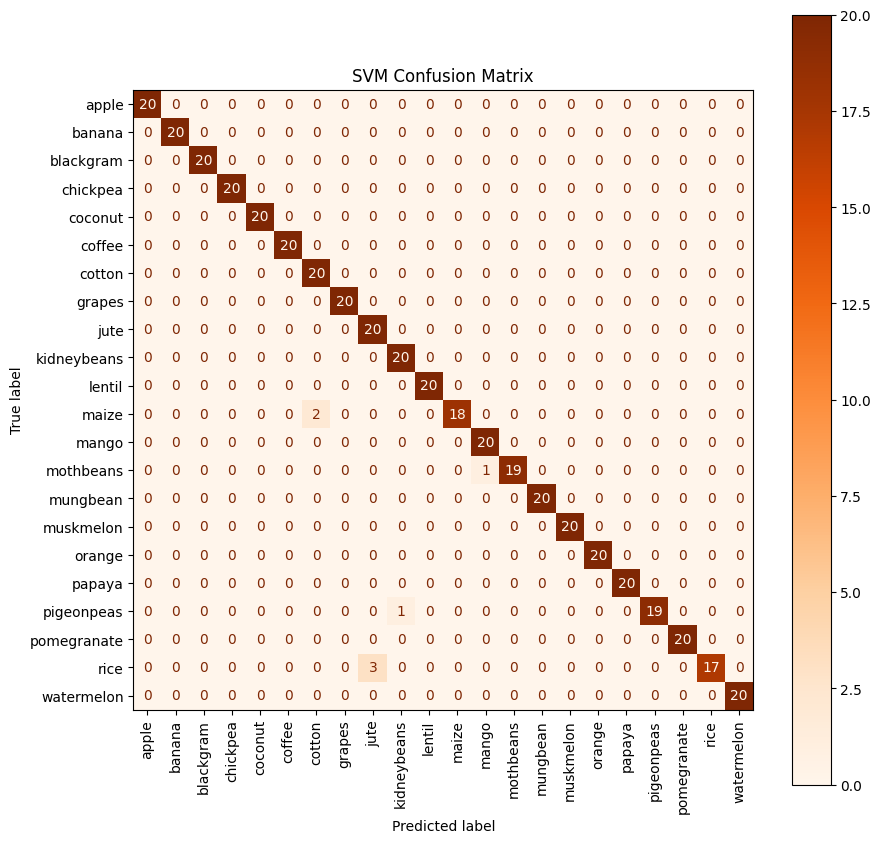

In [ ]:
from sklearn.svm import SVC

# Train
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("⚡ SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Oranges', xticks_rotation=90, ax=plt.gca())
plt.title("SVM Confusion Matrix")
plt.show()


📈 Logistic Regression Accuracy: 97.27 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange    

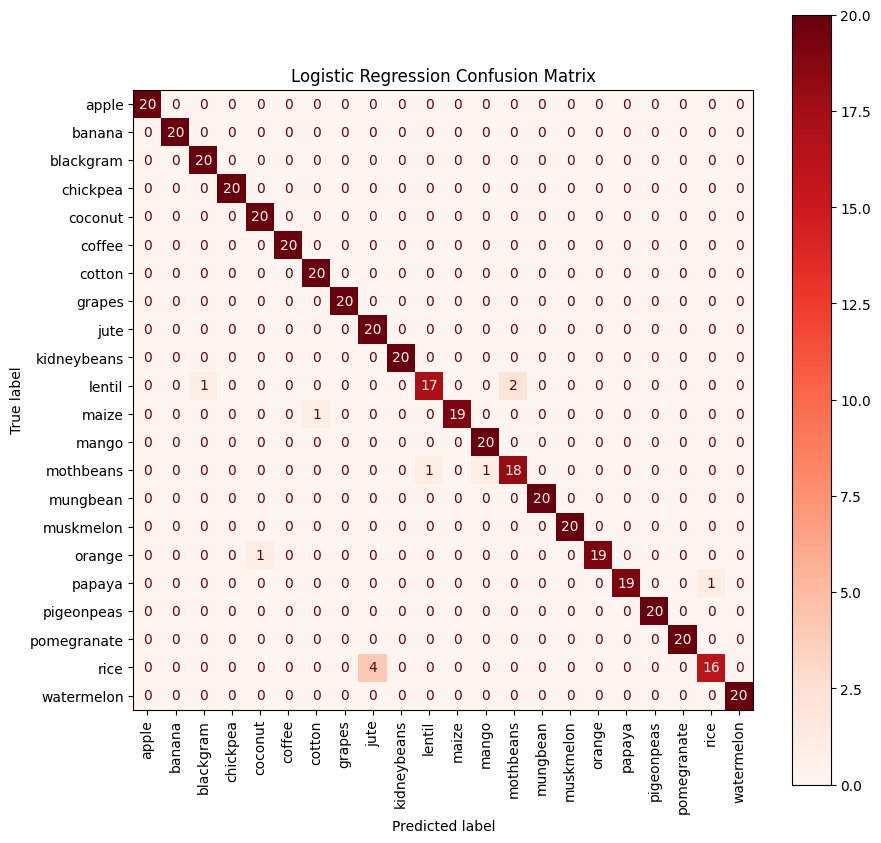

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("📈 Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Reds', xticks_rotation=90, ax=plt.gca())
plt.title("Logistic Regression Confusion Matrix")
plt.show()


💎 XGBoost Accuracy: 99.32 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00     

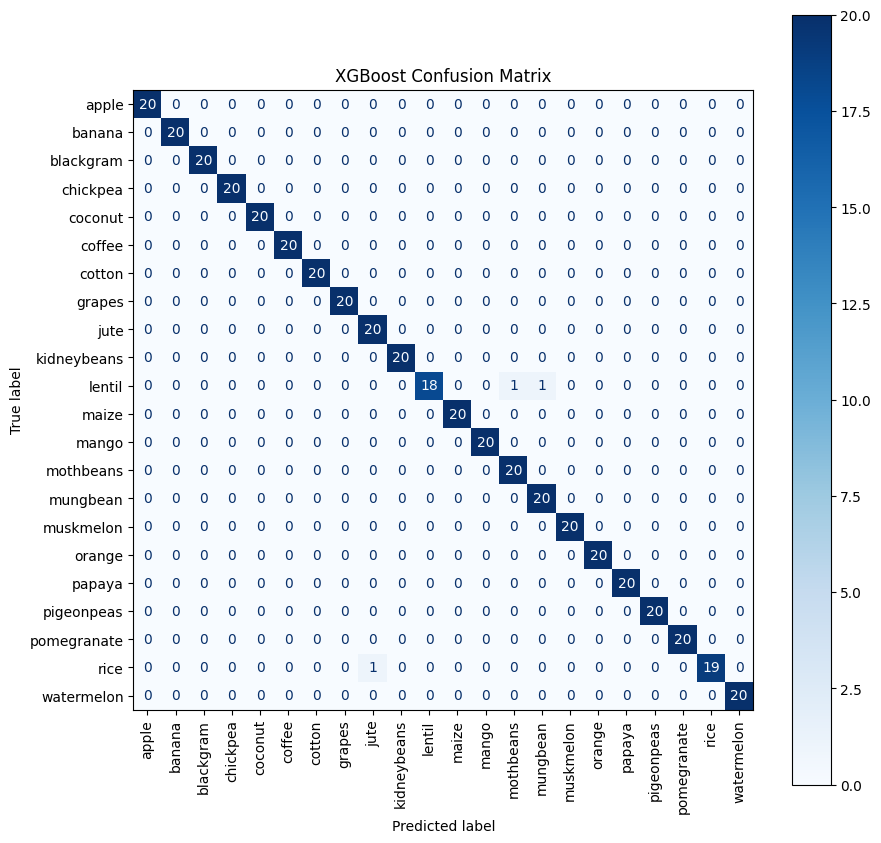

In [ ]:
!pip install xgboost -q
from xgboost import XGBClassifier

# Train
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("💎 XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=90, ax=plt.gca())
plt.title("XGBoost Confusion Matrix")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


⚡ LightGBM Accuracy: 98.86 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

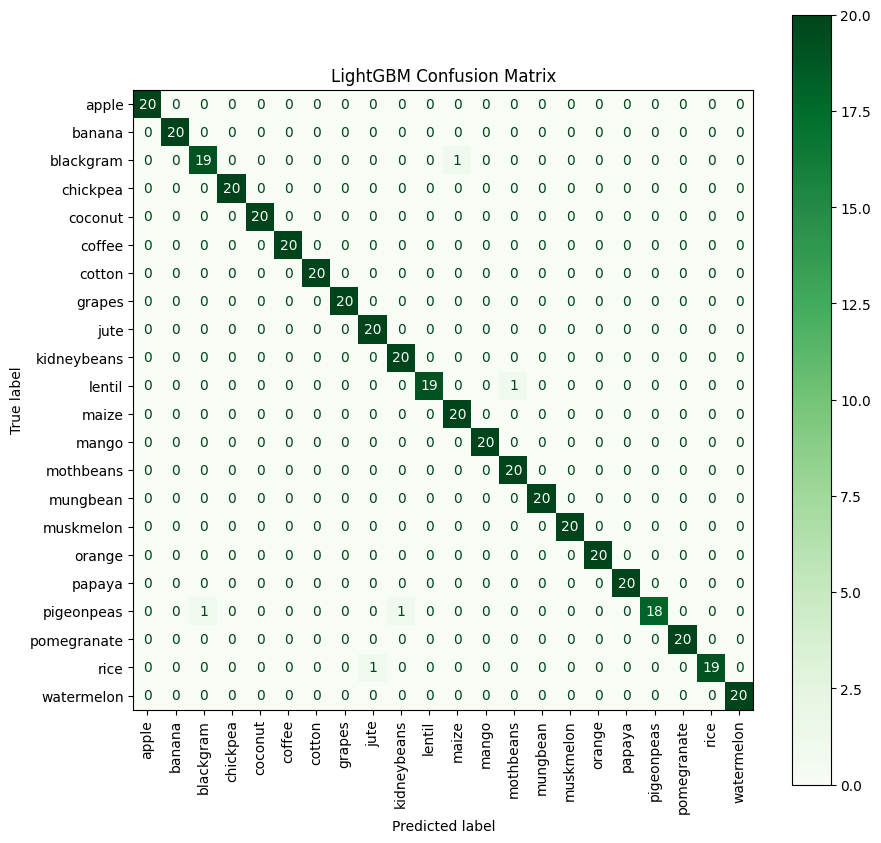

In [ ]:
!pip install lightgbm -q
from lightgbm import LGBMClassifier

# Train
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate
print("⚡ LightGBM Accuracy:", round(accuracy_score(y_test, y_pred_lgbm) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Greens', xticks_rotation=90, ax=plt.gca())
plt.title("LightGBM Confusion Matrix")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00
0:	learn: 2.3829134	test: 2.3819487	best: 2.3819487 (0)	total: 112ms	remaining: 33.6s
50:	learn: 0.1166161	test: 0.1331355	best: 0.1331355 (50)	total: 1.94s	remaining: 9.46s
100:	learn: 0.0456975	test: 0.0603971	best: 0.0603971 (100)	total: 3.26s	remaining: 6.42s
150:	learn: 0.0273218	test: 0.0418441	best: 0.0418441 (150)	total: 4.56s	remaining: 4.5s
200:	learn: 0.0194980	test: 0.0336602	best: 0.0336602 (200)	total: 6.14s	remaining: 3.02s
250:	learn: 0.0150977	test: 0.0286993	best: 0.0286993 (250)	total: 8.34s	remaining: 1.63s
299:	learn: 0.0122007	test: 0.0250620	best: 0.0250620 (299)	total: 9.64s	remaining: 0us

bestTest = 0.02506200309
bestIteration = 299

CatBoost Accuracy: 0.9954545454545455

Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95     

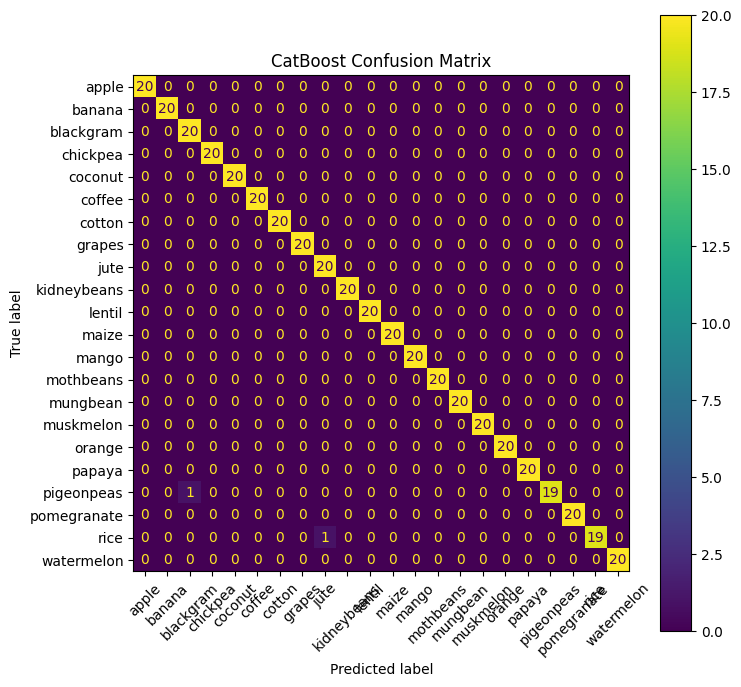

In [ ]:
# install if not installed
!pip install -q catboost

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use a smaller number of iterations and early stopping for quick experiments
cat = CatBoostClassifier(
    iterations=300,           # max number of boosting rounds (reduced for speed)
    learning_rate=0.1,        # reasonable default
    depth=6,                  # tree depth
    eval_metric='MultiClass', # multi-class metric
    random_seed=42,
    verbose=50,               # print progress every 50 iterations
    task_type='CPU',          # use CPU (change to 'GPU' only if GPU is available)
    thread_count=2,           # limit CPU threads so Colab stays responsive
    early_stopping_rounds=30, # stop if no improvement on eval set
    use_best_model=True
)

# If you scaled features earlier (scaler), use scaled data; otherwise use X_train/X_test
# Example assumes X_train and X_test are numpy arrays or DataFrames and y_train/y_test are defined
eval_pool = Pool(X_test, y_test)

# Fit with eval_set for early stopping and monitoring
cat.fit(X_train, y_train, eval_set=eval_pool)

# Predict and evaluate
y_pred_cat = cat.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification report:\n", classification_report(y_test, y_pred_cat, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(ax=plt.gca(), xticks_rotation=45)
plt.title("CatBoost Confusion Matrix")
plt.show()

# Save model
cat.save_model("catboost_model.cbm")


In [ ]:
import numpy as np

def predict_crop_catboost():
    print("🌾 Enter the environmental and soil details below:")

    # Taking input from user
    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value: "))
    rainfall = float(input("Rainfall (mm): "))

    # Prepare and scale the data
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    data_scaled = scaler.transform(data)

    # Predict using CatBoost model
    prediction = cat.predict(data_scaled)
    crop_name = le.inverse_transform(prediction)[0]

    print(f"\n✅ Recommended Crop: **{crop_name.upper()}**")

# Run the prediction function
predict_crop_catboost()


🌾 Enter the environmental and soil details below:
Nitrogen content (N): 40
Phosphorus content (P): 72
Potassium content (K): 77
Temperature (°C): 17.02
Humidity (%): 16.98
pH value: 7.48
Rainfall (mm): 88.55

✅ Recommended Crop: **CHICKPEA**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!pip install catboost -q
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Train CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Predict probabilities from both models
rf_pred_proba = rf.predict_proba(X_test)
cat_pred_proba = cat.predict_proba(X_test)

# Average probabilities (soft voting)
avg_pred_proba = (rf_pred_proba + cat_pred_proba) / 2
final_pred = np.argmax(avg_pred_proba, axis=1)

# Evaluate accuracy
acc = accuracy_score(y_test, final_pred)
print(f"🌿 Hybrid RandomForest + CatBoost Accuracy: {acc * 100:.2f}%")


🌿 Hybrid RandomForest + CatBoost Accuracy: 99.77%


In [ ]:
# Check which of the required objects exist
required_objects = ['rf', 'cat', 'scaler', 'le']
for obj in required_objects:
    if obj in globals():
        print(f"✅ {obj} is available in memory.")
    else:
        print(f"❌ {obj} is NOT found — you may need to load or train it.")


✅ rf is available in memory.
✅ cat is available in memory.
✅ scaler is available in memory.
✅ le is available in memory.


In [ ]:
!pip install -q gradio


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd

# Function to predict crop
def predict_crop(N, P, K, temperature, humidity, ph, rainfall, model_choice, cat_weight):
    X = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    X_scaled = scaler.transform(X)

    if model_choice == "Random Forest":
        proba = rf.predict_proba(X_scaled)[0]
    elif model_choice == "CatBoost":
        proba = cat.predict_proba(X_scaled)[0]
    else:  # Hybrid
        rf_proba = rf.predict_proba(X_scaled)[0]
        cat_proba = cat.predict_proba(X_scaled)[0]
        proba = (1 - cat_weight) * rf_proba + cat_weight * cat_proba

    # Get top 5 predicted crops
    sorted_idx = np.argsort(proba)[::-1]
    top5 = [(le.inverse_transform([i])[0], float(proba[i])) for i in sorted_idx[:5]]
    best_crop = top5[0][0]
    df = pd.DataFrame(top5, columns=["Crop", "Probability"])
    return best_crop, df

# Build Gradio UI
with gr.Blocks(title="🌾 Crop Recommendation App") as demo:
    gr.Markdown("## 🌾 Crop Recommendation System — Hybrid (Random Forest + CatBoost)")

    with gr.Row():
        N = gr.Slider(0, 150, value=50, step=1, label="Nitrogen (N)")
        P = gr.Slider(0, 150, value=50, step=1, label="Phosphorus (P)")
        K = gr.Slider(0, 150, value=50, step=1, label="Potassium (K)")

    with gr.Row():
        temperature = gr.Slider(0.0, 50.0, value=25.0, step=0.5, label="Temperature (°C)")
        humidity = gr.Slider(0.0, 100.0, value=60.0, step=0.5, label="Humidity (%)")
        ph = gr.Slider(0.0, 14.0, value=7.0, step=0.1, label="pH Value")
        rainfall = gr.Slider(0.0, 300.0, value=100.0, step=1.0, label="Rainfall (mm)")

    model_choice = gr.Radio(
        ["Hybrid (RF + CatBoost)", "Random Forest", "CatBoost"],
        value="Hybrid (RF + CatBoost)",
        label="Select Model"
    )

    cat_weight = gr.Slider(0.0, 1.0, value=0.6, step=0.05, label="CatBoost Weight (Hybrid Only)")

    btn = gr.Button("🔮 Predict Crop")
    output_label = gr.Label(label="Recommended Crop")
    output_table = gr.DataFrame(headers=["Crop", "Probability"], label="Top 5 Predictions")

    btn.click(
        predict_crop,
        inputs=[N, P, K, temperature, humidity, ph, rainfall, model_choice, cat_weight],
        outputs=[output_label, output_table]
    )

# Launch app (share=True gives a public URL)
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c77d4ee5fd95d83f64.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import joblib

# Save Random Forest model
joblib.dump(rf, "crop_model.pkl")

# Save Scaler and Label Encoder
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

# Save CatBoost model
cat.save_model("catboost_model.cbm")

print("✅ All models saved successfully in Colab workspace!")


✅ All models saved successfully in Colab workspace!


In [ ]:
from google.colab import files

files.download("crop_model.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")
files.download("catboost_model.cbm")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>